# Lab 1
### Hafsah Shaik
### QMSS GR5015 - Data Analysis
### 10/8/22


Set up code and data import:

In [14]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Data/GSS.2006.csv')
df.head(10)

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
0,1,1957,1,3,316,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1957,2,2,630,1,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1957,2,2,314,2,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1957,1,1,313,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1957,3,1,322,2,2,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,1957,2,2,709,2,2,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,1957,1,3,610,2,2,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,1957,3,4,324,2,1,1,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2,1957,1,3,709,1,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,1957,2,1,630,2,1,1,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
for col in df.columns: 
    print(col)

vpsu
vstrat
adults
ballot
dateintv
famgen
form
formwt
gender1
hompop
id
intage
intid
intyrs
mode
oversamp
phase
race
reg16
region
relate1
relhh1
relhhd1
respnum
rvisitor
sampcode
sample
sex
size
spaneng
srcbelt
version
visitors
wtss
wtssall
wtssnr
xnorcsiz
year
hispanic
rplace
degree
hefinfo
wrkstat
racecen1
marital
phone
comprend
coop
feeused
hhrace
lngthinv
educ
childs
ethnum
age
cohort
intrace1
attend
inthisp
hhtype
hhtype1
earnrs
whoelse6
whoelse1
whoelse2
whoelse3
whoelse4
whoelse5
partyid
relig
teens
preteen
babies
reliten
dwelling
vote04
mar1
zodiac
old1
fund
polviews
income
income06
wrkslf
isco681
isco88
occ80
prestg80
wrkgovt
sei
intethn
intsex
indus80
eth1
trust
realinc
coninc
ethnic
health
union
gender2
relate2
relhh2
relhhd2
wksub
wksup
old2
mar2
widowed
unrelat
born
saqsex
weekswrk
family16
relig16
res16
sibs
parborn
happy
mobile16
satfin
finalter
relactiv
relexper
savesoul
class
pray
relpersn
relexp
god
reborn
finrela
sprtprsn
rellife
pres04
bible
vote00
rotapple
blkwhite

In [17]:
df.describe()

,vpsu,vstrat,adults,ballot,dateintv,famgen,form,formwt,gender1,hompop,...,away7,gender14,old14,relate14,relhh14,relhhd14,relsp14,where12,where6,where7
count,4510.000000,4510.000000,4510.00000,4510.000000,4510.000000,4510.000000,4510.000000,4510.0,4510.000000,4510.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,1.506430,2064.592461,1.86031,2.672506,467.352772,1.526608,1.507761,1.0,1.431264,2.482040,...,1.0,2.0,3.0,7.0,11.0,11.0,11.0,3.0,3.0,3.0
std,0.500014,40.684902,0.79809,1.156935,132.046577,0.822492,0.499995,0.0,0.495308,1.407142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1957.000000,1.00000,1.000000,307.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,2.0,3.0,7.0,11.0,11.0,11.0,3.0,3.0,3.0
25%,1.000000,2039.000000,1.00000,2.000000,330.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.0,2.0,3.0,7.0,11.0,11.0,11.0,3.0,3.0,3.0
50%,2.000000,2083.000000,2.00000,3.000000,422.000000,1.000000,2.000000,1.0,1.000000,2.000000,...,1.0,2.0,3.0,7.0,11.0,11.0,11.0,3.0,3.0,3.0
75%,2.000000,2094.000000,2.00000,4.000000,523.000000,2.000000,2.000000,1.0,2.000000,3.000000,...,1.0,2.0,3.0,7.0,11.0,11.0,11.0,3.0,3.0,3.0
max,2.000000,2105.000000,8.00000,4.000000,807.000000,7.000000,2.000000,1.0,2.000000,11.000000,...,1.0,2.0,3.0,7.0,11.0,11.0,11.0,3.0,3.0,3.0


#### 1 - Choose one variable, look at its distribution, and plot a histogram of it.  Explain what you take away from looking at the variable.

I chose to look at the variable age when first child was born (agekdbrn). This variable captures the question that asked respondents how old they were when their first children were born. As the table below indicates, the mean age an adult was when their first child was born is 23.87, with a standard deviation of 5.63. The median age was 23, which indicates a slight right-skew. The histogram better displays this skew, showing the mode at around 20 and outliers up to age 56. I found these results interesting, particularly the skew. The results show that it was much more common for for adults to become parents in their very early 20s back in 2006, and it was rarer for adults to have their first children in their 30s and onwards. As a 21-year-old with no plans of having children in the next 2 years, I would be very interested to compare these data with those of today in 2022 to see how things have changed.


In [18]:
df['agekdbrn'].describe()

count    2148.000000
mean       23.874767
std         5.628513
min        13.000000
25%        20.000000
50%        23.000000
75%        27.000000
max        56.000000
Name: agekdbrn, dtype: float64

<AxesSubplot:>

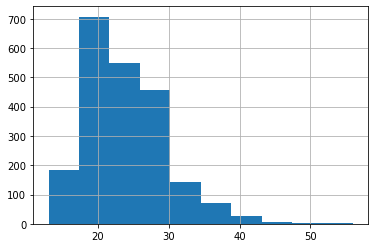

In [19]:
# plotting histogram for agekdbrn

%matplotlib inline
df['agekdbrn'].hist(bins=10)

#### 2 - Choose some continuous-ish variable, and calculate its mean and standard deviation by some grouping variable.  Explain what conclusion you draw from this analysis.

I chose to look at the "continous-ish" variable of how many children one had (childs). Although this variable is ordinal, I considered it to fall under the "continous-ish" realm as there is technically no limit to the number of kids one can have. I grouped variable of number of children by the variable of race. 

Race in this context is classified as 
1) white 
2) black (2), or 
3) other 
and respondents responded as such. I thought it would be interesting to see if there was any pattern between race and number of children. 

However, the average number of children was very close for all three groups, as indicated by the chart and the boxplot below. All groups had about an average of 2 children. The White group did have a slightly lower mean at 1.83, compared to 2.07 for the Black group and 2.08 for other. The boxplot also show a slight difference in distribution between the three groups, although further analyses need to be conducted to find any signficant differences. This is overall an interesting result because it indicates that race is not associated with number of children. 


In [20]:
# finding mean of childs variable for each race

df.groupby('race').agg({'childs':['mean','std']})

childs          
          mean       std
race                    
1     1.832112  1.606823
2     2.071429  1.889552
3     2.079526  1.826946

<AxesSubplot:title={'center':'childs'}, xlabel='[race]'>

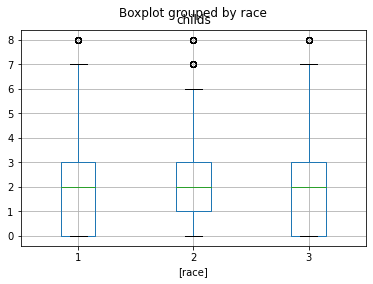

In [21]:
%matplotlib inline
df.boxplot(column='childs', by=['race'])

#### 3 - Choose two categorical-ish variables, and cross-tabulate them.  Explain what conclusion you draw from this analysis.

I chose to look at the 'categorical-ish" variables of who one was living with at 16 (family16) and marital status (marital). The family16 variable holds the responses to the question of with whom one was living with at the age of 16. 
Respondents answered whether they were living with:
1) Both their mother and father  
2) father and stepmother 
3) mother and stepfather
4) father only
5) mother only
6) some other male relative only
7) some other female relative only (7)
8) another arrangement, or 
0) other (0). 

The marital status variable holds the responses to the question of what one's currentl marital status was. The respondents answered that they were 
1) married
2) widowed
3) divorced 
4) separated
5) never married

I thought it would be interesting to see whether there was a pattern in marital status depending on how one was brought up. 

In [22]:
pd.crosstab(index=df["family16"], columns=df["marital"])


marital,1.0,2.0,3.0,4.0,5.0
family16,,,,,
0.0,30,14,21,5,18
1.0,1074,181,327,57,445
2.0,26,4,7,2,15
3.0,71,13,45,9,51
4.0,23,10,6,4,32
5.0,157,22,65,21,139
6.0,3,0,1,0,2
7.0,13,8,4,1,15
8.0,17,5,10,3,14


Although this cross-tabulation does not calculate correlations, there do seem to be some patterns here. For those who were living with both parents at 16 (1.0 for family16), a majority were married at the time of the survey. Within the latter categories where people grew up without one or more parents, there seem to be higher numbers of unmarried and divorced or separated individuals. This could mean that parents' marital status affects children's marital status when they grow up. I do think there may be some interesting associations within this data if studied more, and I find these results very interesting. 
